<a href="https://colab.research.google.com/github/minzeros/codestates_section_project/blob/main/section3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터 설명
데이터셋은 캐글에서 가져왔으며, 원본 데이터셋은 포르투갈의 Algarve와 Lisbon에 있는 두 호텔의 PMS(Property Management System)에서 추출되어 가공되었다고 한다. 데이터셋에는 2015년 7월 1일부터 2017년 8월 31일 사이에 호텔에 도착하는 예약 기록이 있으며, 호텔의 유형, 숙박 날짜, 숙박 기간, 숙박 인원, 선택한 식사의 종류, 예약한 객실의 종류, 그리고 체크인 여부 등 호텔의 예약과 관련된 정보들이 담겨 있다. 다만, 실제 데이터이기 때문에 익명화를 위해서 예약한 여행사와 같은 항목은 이름 대신 숫자 형식의 코드로 제공되었다.

## 컬럼 설명

hotel : 호텔 종류

is_canceled : 캔슬 여부 (1: yes / 0: no)

lead_time : 예약한 날짜와 호텔에 도착한 날짜 사이의 경과일

arrival_date_year : 호텔 도착 연도

arrival_date_month : 호텔 도착 월

arrival_date_week_number : 호텔 도착 주

arrival_date_day_of_month : 호텔 도착 일

stays_in_weekend_nights : 주말 숙발 일수 (토,일)

stays_in_week_nights : 평일 숙박 일수

adults : 성인 인원 수

children : 아동/청소년 인원 수

babies : 유아 인원 수

meal : 식사 예약 종류

country : 호텔 위치 국가

market_segment : 마켓 구분 (TA: Travel Agent / TO: Tour Operators)

distribution_channel : 예약 채널 (TA: Travel Agent / TO: Tour Operators)

is_repeated_guest : 재방문 고객 여부 (1: yes / 0: no)

previous_cancellations : 이번 예약 전에 고객이 취소한 예약 수

previous_bookings_not_canceled : 이번 예약 전에 고객이 취소하지 않은 예약 수

reserved_room_type : 예약 객실 타입

assigned_room_type : 배정된 객실 타입

booking_changes : 예약 후 예약 변경/수정 횟수

deposit_type : 보증금 타입

agent : 예약 에이전트 (ID로 대체)

company : 예약 회사명 (ID로 대체)

days_in_waiting_list : 예약 확정 전까지 대기 명단에 있었던 기간

customer_type : 고객 유형

adr : 평균 숙박 일별 요금

required_car_parking_spaces : 주차 차량 대수

total_of_special_requests : 고객이 요청한 요구사항 수

reservation_status : 마지막 예약 상태

reservation_status_date : 마지막 예약 상태가 설정된 일자

## 데이터 가져오기

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [ ]:
hotel = pd.read_csv('/content/hotel_bookings.csv')

In [ ]:
hotel.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [ ]:
# 수치형 데이터 확인

hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
# 범주형 데이터 확인

hotel.describe(include=object)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


## 데이터 전처리 (EDA)

### 결측치 확인

In [ ]:
hotel.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
hotel['children'].value_counts(dropna=False)

0.0     110796
1.0       4861
2.0       3652
3.0         76
NaN          4
10.0         1
Name: children, dtype: int64

In [ ]:
hotel['children'].fillna(0, inplace=True)

In [ ]:
hotel['deposit_type'].value_counts()

No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

In [ ]:
hotel['is_repeated_guest'].value_counts()

0    115580
1      3810
Name: is_repeated_guest, dtype: int64

In [ ]:
len(hotel[hotel['is_repeated_guest']==1])

3810

In [ ]:
hotel[hotel['is_repeated_guest']==0]['is_canceled'].value_counts(normalize=True)

0    0.622149
1    0.377851
Name: is_canceled, dtype: float64

In [ ]:
hotel[hotel['is_repeated_guest']==1]['is_canceled'].value_counts(normalize=True)

0    0.855118
1    0.144882
Name: is_canceled, dtype: float64

### 사용할 feature 선택

In [ ]:
features = ['is_canceled', 'lead_time', 'arrival_date_month', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']

df_hotel = hotel[features]

In [ ]:
df_hotel.head()

,is_canceled,lead_time,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,adr,required_car_parking_spaces,total_of_special_requests
0,0,342,July,1,0,0,2,0.0,0,0,0.0,0,0
1,0,737,July,1,0,0,2,0.0,0,0,0.0,0,0
2,0,7,July,1,0,1,1,0.0,0,0,75.0,0,0
3,0,13,July,1,0,1,1,0.0,0,0,75.0,0,0
4,0,14,July,1,0,2,2,0.0,0,0,98.0,0,1


In [ ]:
df_hotel.isnull().sum()

is_canceled                  0
lead_time                    0
arrival_date_month           0
arrival_date_day_of_month    0
stays_in_weekend_nights      0
stays_in_week_nights         0
adults                       0
children                     0
babies                       0
is_repeated_guest            0
adr                          0
dtype: int64

### 이상치 제거

In [ ]:
df_hotel[df_hotel['adr'] < 0]

,is_canceled,lead_time,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,adr
14969,0,195,March,5,4,6,2,0.0,0,1,-6.38


In [ ]:
df_hotel = df_hotel[df_hotel['adr'] > 0]

In [ ]:
df_hotel = df_hotel[(df_hotel['stays_in_week_nights'] + df_hotel['stays_in_weekend_nights']) > 0]

In [ ]:
df_hotel['lead_time'].value_counts()

0      5769
1      3285
2      1991
3      1741
4      1646
       ... 
380       1
532       1
435       1
371       1
424       1
Name: lead_time, Length: 478, dtype: int64

In [ ]:
df_hotel['adults'].value_counts()

2    88777
1    22165
3     6176
0      248
4       60
Name: adults, dtype: int64

In [ ]:
df_hotel['children'].value_counts()

0     108928
1       4807
2       3615
3         75
10         1
Name: children, dtype: int64

In [ ]:
df_hotel['babies'].value_counts()

0     116538
1        875
2         15
10         1
9          1
Name: babies, dtype: int64

In [ ]:
df_hotel = df_hotel[df_hotel['babies'] < 5]

In [ ]:
df_hotel['babies'].value_counts()

0    116536
1       875
2        15
Name: babies, dtype: int64

In [ ]:
df_hotel['adr'].value_counts

<bound method IndexOpsMixin.value_counts of 0          75.00
1          75.00
2          98.00
3          98.00
4         107.00
           ...  
117421     96.14
117422    225.43
117423    157.71
117424    104.40
117425    151.20
Name: adr, Length: 117426, dtype: float64>

In [ ]:
df_hotel['required_car_parking_spaces'].value_counts()

0    110120
1      7275
2        28
3         3
Name: required_car_parking_spaces, dtype: int64

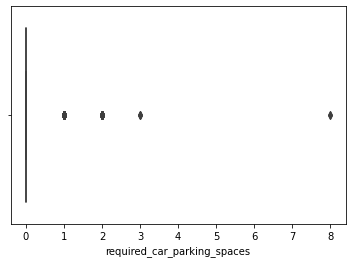

In [ ]:
sns.boxplot(data=df_hotel, x='required_car_parking_spaces')

In [ ]:
df_hotel = df_hotel[df_hotel['required_car_parking_spaces'] < 4]

In [ ]:
df_hotel['total_of_special_requests'].value_counts()

0    69138
1    32725
2    12763
3     2436
4      324
5       40
Name: total_of_special_requests, dtype: int64

In [ ]:
df_hotel

,is_canceled,lead_time,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,adr,required_car_parking_spaces,total_of_special_requests
2,0,7,July,1,0,1,1,0.0,0,0,75.00,0,0
3,0,13,July,1,0,1,1,0.0,0,0,75.00,0,0
4,0,14,July,1,0,2,2,0.0,0,0,98.00,0,1
5,0,14,July,1,0,2,2,0.0,0,0,98.00,0,1
6,0,0,July,1,0,2,2,0.0,0,0,107.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,August,30,2,5,2,0.0,0,0,96.14,0,0
119386,0,102,August,31,2,5,3,0.0,0,0,225.43,0,2
119387,0,34,August,31,2,5,2,0.0,0,0,157.71,0,4
119388,0,109,August,31,2,5,2,0.0,0,0,104.40,0,0


## 기준모델

정확도 63%

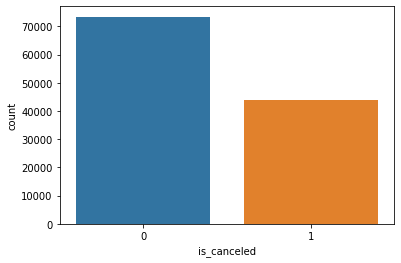

In [ ]:
sns.countplot(data=df_hotel, x='is_canceled')

In [ ]:
df_hotel['is_canceled'].value_counts(normalize=True)

0    0.625202
1    0.374798
Name: is_canceled, dtype: float64

## 데이터 시각화

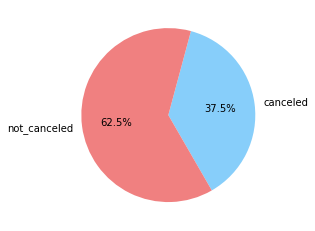

In [ ]:
canceled = len(df_hotel[df_hotel['is_canceled'] == 1]) / len(df_hotel)
not_canceled = len(df_hotel[df_hotel['is_canceled'] == 0]) / len(df_hotel)
ratio = [canceled, not_canceled]
labels = ['canceled', 'not_canceled']
colors = ['lightskyblue', 'lightcoral']

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=300, colors=colors)
plt.show()

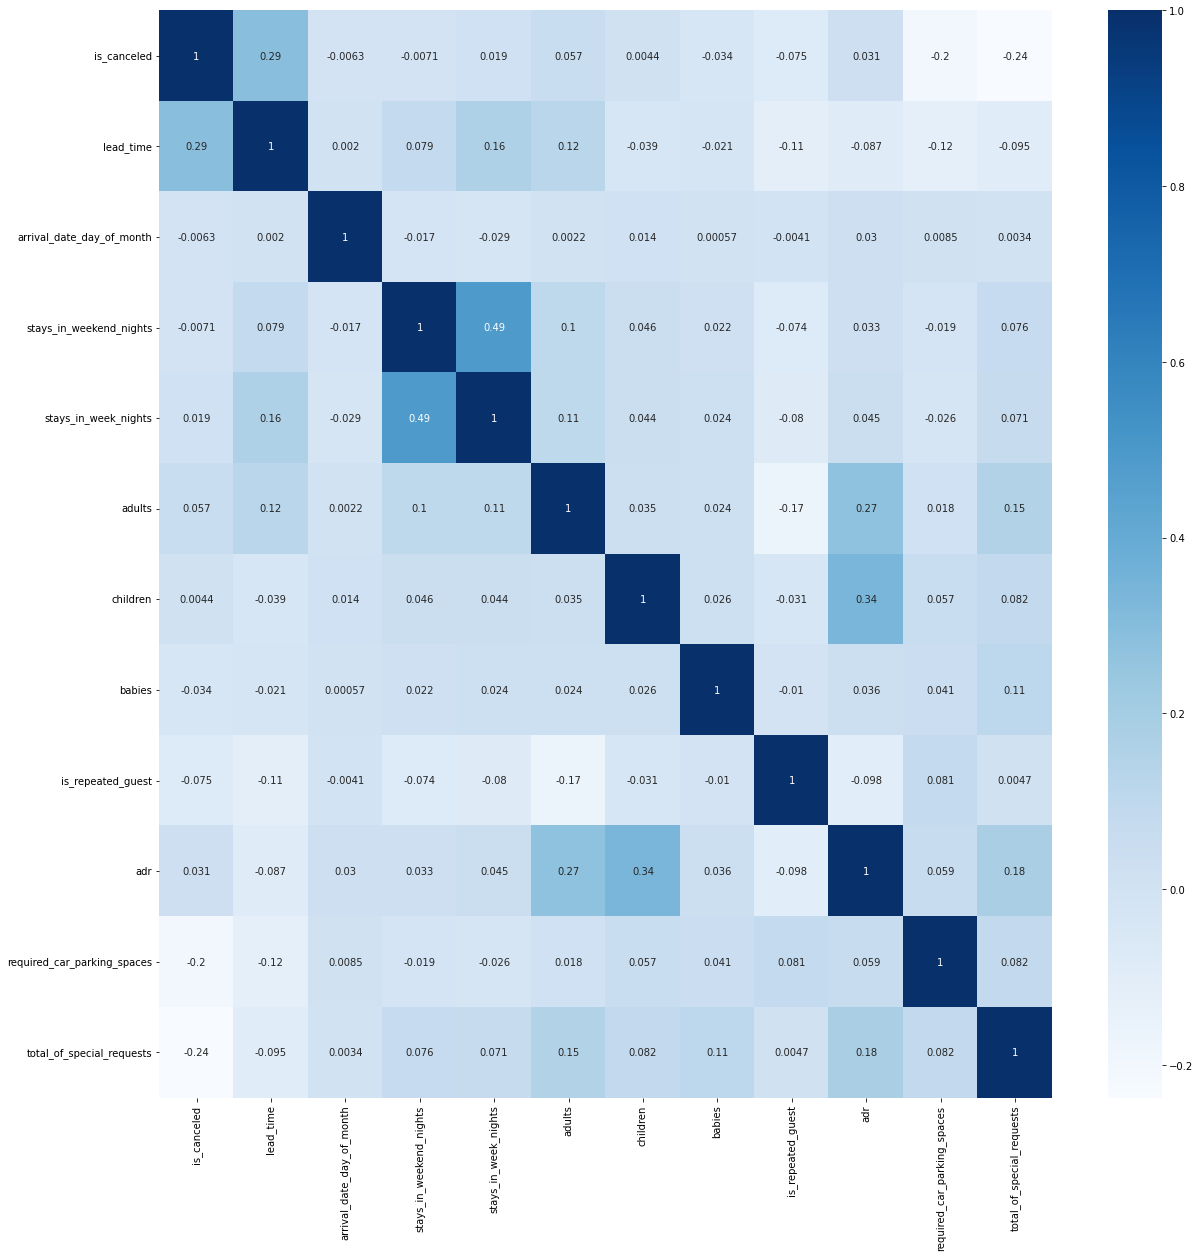

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df_hotel.corr(), annot=True, cmap='Blues')

## 머신러닝

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

train, test = train_test_split(df_hotel, test_size=0.2, random_state=10)
len(train), len(test)

(93940, 23486)

In [ ]:
train, val = train_test_split(train, test_size=0.2, random_state=10)
len(train), len(val)

(75152, 18788)

In [ ]:
target = 'is_canceled'
features = train.drop(target, axis=1).columns

X_train = train[features]
y_train = train[target]
# X_val = val[features]
# y_val = val[target]

In [ ]:
X_test = test[features]
y_test = test[target]

In [ ]:
len(X_train), len(X_test)

(93940, 23486)

In [ ]:
X_train

,lead_time,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,adr,required_car_parking_spaces,total_of_special_requests
68185,D,May,26,1,2,2,0,0,0,140.00,0,0
97482,F,October,4,1,5,2,0,0,0,123.33,0,0
16055,D,August,20,0,2,2,0,0,0,120.60,0,2
75070,F,October,16,0,2,2,0,0,0,101.50,0,0
31889,A,January,29,1,0,2,0,0,1,45.00,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
93553,D,August,8,2,5,2,2,0,0,184.95,0,1
50496,A,May,20,0,1,3,0,0,0,176.00,0,0
94735,D,August,27,2,3,2,0,0,0,137.70,0,2
105597,C,March,10,1,2,2,0,0,0,80.00,0,2


In [ ]:
baseline = y_train.mode()[0]
y_pred = [baseline] * len(y_train)
print("training accuracy: ", accuracy_score(y_train, y_pred))

training accuracy:  0.6267165211837343


In [ ]:
baseline = y_val.mode()[0]
y_pred = [baseline] * len(y_val)
print("validation accuracy: ", accuracy_score(y_val, y_pred))

validation accuracy:  0.6185863317010858


In [ ]:
df_hotel.to_csv('hotel.csv')

In [ ]:
!pip install category_encoders

     |████████████████████████████████| 82 kB 390 kB/s 


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from category_encoders import OneHotEncoder
from sklearn.preprocessing import StandardScaler

logistic_pipe = make_pipeline(
    OneHotEncoder(), 
    StandardScaler(), 
    LogisticRegression(n_jobs=-1)
)
logistic_pipe.fit(X_train, y_train)

print('검증세트 정확도', logistic_pipe.score(X_val, y_val))

검증세트 정확도 0.7167340855865446


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

dt_pipe = make_pipeline(
    OneHotEncoder(use_cat_names=True),  
    DecisionTreeClassifier(random_state=1, max_depth=10)
)

dt_pipe.fit(X_train, y_train)
print('훈련 정확도: ', dt_pipe.score(X_train, y_train))
print('검증 정확도: ', dt_pipe.score(X_val, y_val))
print(classification_report(y_val, dt_pipe.predict(X_val)))

훈련 정확도:  0.7657813497977433
검증 정확도:  0.7496274217585693
              precision    recall  f1-score   support

           0       0.76      0.87      0.81     11622
           1       0.72      0.56      0.63      7166

    accuracy                           0.75     18788
   macro avg       0.74      0.71      0.72     18788
weighted avg       0.75      0.75      0.74     18788



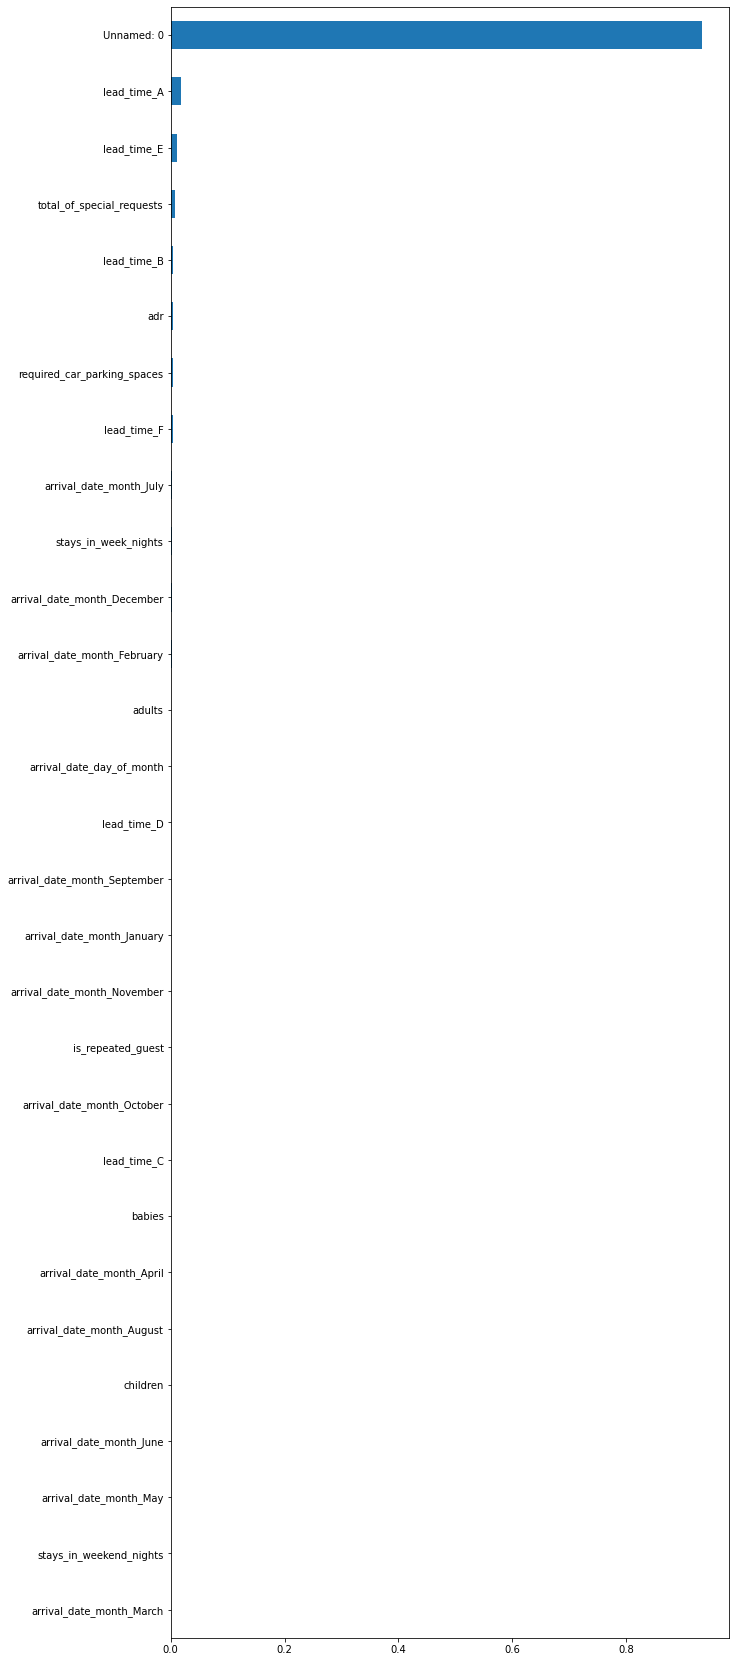

In [ ]:
model_dt = dt_pipe.named_steps['decisiontreeclassifier']
enc = dt_pipe.named_steps['onehotencoder']
encoded_columns = enc.transform(X_val).columns
importances = pd.Series(model_dt.feature_importances_, encoded_columns)

plt.figure(figsize=(10,30))
importances.sort_values().plot.barh()

In [ ]:
from category_encoders import OrdinalEncoder

rf_pipe = make_pipeline(
    OrdinalEncoder(),
    RandomForestClassifier(n_jobs=-1, random_state=10, oob_score=True)
)

rf_pipe.fit(X_train, y_train)
print('훈련 정확도: ', rf_pipe.score(X_train, y_train))
print('검증 정확도: ', rf_pipe.score(X_val, y_val))
print(classification_report(y_val, rf_pipe.predict(X_val)))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


훈련 정확도:  0.9814376197572919
검증 정확도:  0.8173834362358953
              precision    recall  f1-score   support

           0       0.82      0.91      0.86     11622
           1       0.82      0.67      0.74      7166

    accuracy                           0.82     18788
   macro avg       0.82      0.79      0.80     18788
weighted avg       0.82      0.82      0.81     18788



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

pipe = make_pipeline(
    OrdinalEncoder(),
    RandomForestClassifier(random_state=2)
)
dists = { 
    'randomforestclassifier__n_estimators': randint(50, 500), 
    'randomforestclassifier__max_depth': [5, 10, 15, 20, None], 
    'randomforestclassifier__max_features': uniform(0, 1)
}
clf = RandomizedSearchCV(
    pipe, 
    param_distributions=dists, 
    n_iter=50, 
    cv=3, 
    scoring='accuracy',  
    verbose=1,
    n_jobs=-1
)

clf.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


KeyboardInterrupt: ignored

In [ ]:
pipe = clf.best_estimator_

y_pred_cv = pipe.predict(X_val)
print(classification_report(y_val, y_pred_cv))

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

In [ ]:
from xgboost import XGBClassifier

pipe = make_pipeline(
    OrdinalEncoder(),
    XGBClassifier(n_estimators=200
                  , random_state=2
                  , n_jobs=-1
                  , max_depth=7
                  , learning_rate=0.2
                 )
)

pipe.fit(X_train, y_train);

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = pipe.predict(X_val)
print('검증 정확도: ', accuracy_score(y_val, y_pred))

print(classification_report(y_pred, y_val))

검증 정확도:  0.7985948477751756
              precision    recall  f1-score   support

           0       0.90      0.80      0.85     13154
           1       0.63      0.80      0.70      5634

    accuracy                           0.80     18788
   macro avg       0.77      0.80      0.78     18788
weighted avg       0.82      0.80      0.80     18788



In [ ]:

test_df = pd.DataFrame({
    'lead_time' : ['D'],
    'arrival_date_month' : ['May'],
    'arrival_date_day_of_month' : [26],
    'stays_in_weekend_nights' : [1],
    'stays_in_week_nights' : [2],
    'adults' : [2],
    'children' : [0],
    'babies' : [0],
    'is_repeated_guest' : [0],
    'adr' : [140],
    'required_car_parking_spaces' : [0],
    'total_of_special_requests' : [0]
})

In [ ]:
X_train.dtypes

lead_time                       object
arrival_date_month              object
arrival_date_day_of_month        int64
stays_in_weekend_nights          int64
stays_in_week_nights             int64
adults                           int64
children                         int64
babies                           int64
is_repeated_guest                int64
adr                            float64
required_car_parking_spaces      int64
total_of_special_requests        int64
dtype: object

In [ ]:
X_train.head()

,lead_time,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,adr,required_car_parking_spaces,total_of_special_requests
68185,D,May,26,1,2,2,0,0,0,140.00,0,0
97482,F,October,4,1,5,2,0,0,0,123.33,0,0
16055,D,August,20,0,2,2,0,0,0,120.60,0,2
75070,F,October,16,0,2,2,0,0,0,101.50,0,0
31889,A,January,29,1,0,2,0,0,1,45.00,0,2


In [ ]:
pipe.predict_proba(test_df)[0][1]

0.9086717

In [ ]:
pipe.predict_proba(X_train)

array([[0.09132832, 0.9086717 ],
       [0.71827286, 0.28172714],
       [0.7732742 , 0.2267258 ],
       ...,
       [0.8654607 , 0.1345393 ],
       [0.7429835 , 0.25701648],
       [0.784806  , 0.21519396]], dtype=float32)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = pipe.predict(X_test)
print('검증 정확도: ', accuracy_score(y_test, y_pred))

print(classification_report(y_pred, y_test))

검증 정확도:  0.7991995231201567
              precision    recall  f1-score   support

           0       0.90      0.80      0.85     16518
           1       0.63      0.79      0.70      6968

    accuracy                           0.80     23486
   macro avg       0.76      0.80      0.77     23486
weighted avg       0.82      0.80      0.80     23486



In [ ]:
df_hotel = pd.read_csv('/content/hotel.csv')

In [ ]:
df_hotel.dtypes

Unnamed: 0                       int64
Unnamed: 0.1                     int64
is_canceled                      int64
lead_time                        int64
arrival_date_month              object
arrival_date_day_of_month        int64
stays_in_weekend_nights          int64
stays_in_week_nights             int64
adults                           int64
children                         int64
babies                           int64
is_repeated_guest                int64
adr                            float64
required_car_parking_spaces      int64
total_of_special_requests        int64
dtype: object

In [ ]:
df_hotel['children'].value_counts()

0     108928
1       4807
2       3615
3         75
10         1
Name: children, dtype: int64

In [ ]:
df_hotel['children'] = df_hotel['children'].astype(int)

In [ ]:
df_hotel.dtypes

Unnamed: 0                       int64
is_canceled                      int64
lead_time                        int64
arrival_date_month              object
arrival_date_day_of_month        int64
stays_in_weekend_nights          int64
stays_in_week_nights             int64
adults                           int64
children                         int64
babies                           int64
is_repeated_guest                int64
adr                            float64
required_car_parking_spaces      int64
total_of_special_requests        int64
dtype: object

In [ ]:
df_hotel.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df_hotel.drop('Unnamed: 0.1', axis=1, inplace=True)

(array([4.0721e+04, 1.7929e+04, 1.3921e+04, 1.0216e+04, 9.2620e+03,
        6.9020e+03, 4.8300e+03, 4.2500e+03, 3.4570e+03, 2.3090e+03,
        1.1800e+03, 1.0100e+03, 5.3500e+02, 4.2700e+02, 1.5500e+02,
        1.0800e+02, 8.5000e+01, 1.2800e+02, 0.0000e+00, 1.0000e+00]),
 array([  0.  ,  35.45,  70.9 , 106.35, 141.8 , 177.25, 212.7 , 248.15,
        283.6 , 319.05, 354.5 , 389.95, 425.4 , 460.85, 496.3 , 531.75,
        567.2 , 602.65, 638.1 , 673.55, 709.  ]),
 <a list of 20 Patch objects>)

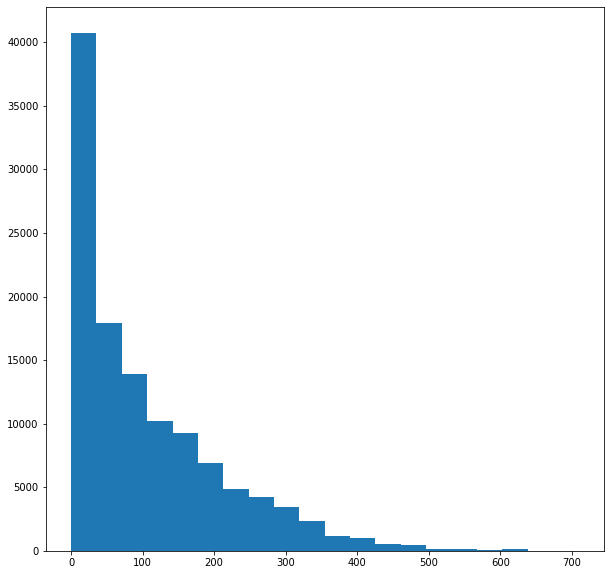

In [ ]:
plt.figure(figsize=(10,10))
plt.hist(df_hotel['lead_time'], bins=20)

In [ ]:
len(df_hotel[df_hotel['lead_time'] <= 30])

37257

In [ ]:
len(df_hotel[(df_hotel['lead_time'] > 30) & (df_hotel['lead_time'] <= 60)])

16819

In [ ]:
len(df_hotel[(df_hotel['lead_time'] > 60) & (df_hotel['lead_time'] <= 100)])

16239

In [ ]:
len(df_hotel[(df_hotel['lead_time'] > 100) & (df_hotel['lead_time'] <= 200)])

26585

In [ ]:
len(df_hotel[(df_hotel['lead_time'] > 200) & (df_hotel['lead_time'] <= 300)])

12691

In [ ]:
len(df_hotel[(df_hotel['lead_time'] > 300) & (df_hotel['lead_time'] <= 800)])

7835

In [ ]:
under30 = df_hotel[df_hotel['lead_time']<=30].index
under60 = df_hotel[(df_hotel['lead_time'] > 30) & (df_hotel['lead_time'] <= 60)].index
under100 = df_hotel[(df_hotel['lead_time'] > 60) & (df_hotel['lead_time'] <= 100)].index
under200 = df_hotel[(df_hotel['lead_time'] > 100) & (df_hotel['lead_time'] <= 200)].index
under300 = df_hotel[(df_hotel['lead_time'] > 200) & (df_hotel['lead_time'] <= 300)].index
others = df_hotel[(df_hotel['lead_time'] > 300) & (df_hotel['lead_time'] <= 800)].index

In [ ]:
df_hotel

,is_canceled,lead_time,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,adr,required_car_parking_spaces,total_of_special_requests
0,0,A,July,1,0,1,1,0,0,0,75.00,0,0
1,0,A,July,1,0,1,1,0,0,0,75.00,0,0
2,0,A,July,1,0,2,2,0,0,0,98.00,0,1
3,0,A,July,1,0,2,2,0,0,0,98.00,0,1
4,0,A,July,1,0,2,2,0,0,0,107.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117421,0,A,August,30,2,5,2,0,0,0,96.14,0,0
117422,0,D,August,31,2,5,3,0,0,0,225.43,0,2
117423,0,B,August,31,2,5,2,0,0,0,157.71,0,4
117424,0,D,August,31,2,5,2,0,0,0,104.40,0,0


In [ ]:
df_hotel.loc[under30, 'lead_time'] = 'A'
df_hotel.loc[under60, 'lead_time'] = 'B'
df_hotel.loc[under100, 'lead_time'] = 'C'
df_hotel.loc[under200, 'lead_time'] = 'D'
df_hotel.loc[under300, 'lead_time'] = 'E'
df_hotel.loc[others, 'lead_time'] = 'F'

In [ ]:
df_hotel

,is_canceled,lead_time,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,adr,required_car_parking_spaces,total_of_special_requests
0,0,A,July,1,0,1,1,0,0,0,75.00,0,0
1,0,A,July,1,0,1,1,0,0,0,75.00,0,0
2,0,A,July,1,0,2,2,0,0,0,98.00,0,1
3,0,A,July,1,0,2,2,0,0,0,98.00,0,1
4,0,A,July,1,0,2,2,0,0,0,107.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117421,0,A,August,30,2,5,2,0,0,0,96.14,0,0
117422,0,D,August,31,2,5,3,0,0,0,225.43,0,2
117423,0,B,August,31,2,5,2,0,0,0,157.71,0,4
117424,0,D,August,31,2,5,2,0,0,0,104.40,0,0


In [ ]:
df_hotel.dtypes

is_canceled                      int64
lead_time                       object
arrival_date_month              object
arrival_date_day_of_month        int64
stays_in_weekend_nights          int64
stays_in_week_nights             int64
adults                           int64
children                         int64
babies                           int64
is_repeated_guest                int64
adr                            float64
required_car_parking_spaces      int64
total_of_special_requests        int64
dtype: object

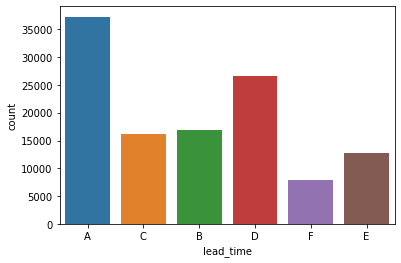

In [ ]:
sns.countplot(data=df_hotel, x='lead_time')

In [ ]:
df_hotel['required_car_parking_spaces'].value_counts()

0    110120
1      7275
2        28
3         3
Name: required_car_parking_spaces, dtype: int64

In [ ]:
df_hotel['total_of_special_requests'].value_counts()

0    69138
1    32725
2    12763
3     2436
4      324
5       40
Name: total_of_special_requests, dtype: int64